In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math
import dopplerShift

data = pd.read_csv('OrbitalDATA.txt', delim_whitespace=True)

dopplerFreqSamples = data['DopplerShift[Hz]'].dropna().to_numpy()
originalSamplingPeriod = 0.01
interpSamplingPeriod = 2.44E-6
StartTime = 100
numInterpSamples=10000000


interpDopplerShift=dopplerShift.GetDopplerShift(dopplerFreqSamples, originalSamplingPeriod, StartTime, numInterpSamples, interpSamplingPeriod)

print(interpDopplerShift)
print(len(interpDopplerShift))


[3.4504145  3.4504145  3.45041449 ... 3.44698955 3.44698955 3.44698955]
10000000


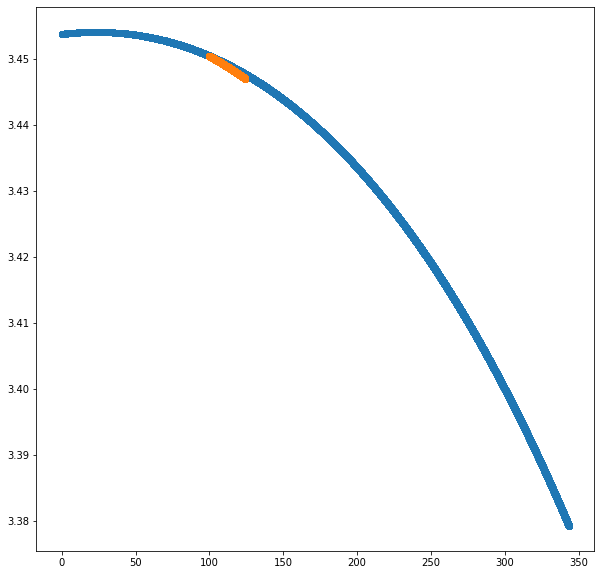

In [2]:
SampleTime = (np.asarray(range(0,len(dopplerFreqSamples))))*originalSamplingPeriod
InterpSampleTime = (np.asarray(range(0,numInterpSamples)))*interpSamplingPeriod
InterpSampleTime = np.asarray([i+StartTime for i in InterpSampleTime])

plt.figure(figsize=(10, 10))
plt.scatter(SampleTime, dopplerFreqSamples)
plt.scatter(InterpSampleTime, interpDopplerShift)


In [ ]:



def sinf(x, A, nu):
    return A * np.cos(nu * x) # sine function with amplitude A and angular frequency

def GetDopplerShift(originalDopplerSamples, originalSamplingPeriod, startingTime, numInterpSamples, interpSamplingPeriod):

    SampleTime = (np.asarray(range(0,len(originalDopplerSamples))))*SamplingPeriod #create the x vector (original)
    InterpSampleTime = (np.asarray(range(0,numInterpSamples)))*InterpSamplingPeriod #create the x vector (interpolated)

    popt, pcov = optimize.curve_fit(f, SampleTime, originalDopplerSamples, p0=[3, 0.00001], full_output=False)

    return sinf(InterSampleTime, popt[0], popt[1])